In [171]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("../dataset/diabetes_data.csv")  # replace with your dataset file
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [172]:
# Rename column 
df.rename(columns={'No_Pation': 'Patient_ID'}, inplace=True)

In [173]:
# Shape
print("Shape:", df.shape)


Shape: (1000, 14)


In [174]:
# Column info
print("\nColumns:", df.columns.tolist())


Columns: ['ID', 'Patient_ID', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS']


In [175]:
# Data types and missing values
print("\nInfo:")
print(df.info())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          1000 non-null   int64  
 1   Patient_ID  1000 non-null   int64  
 2   Gender      1000 non-null   object 
 3   AGE         1000 non-null   int64  
 4   Urea        1000 non-null   float64
 5   Cr          1000 non-null   int64  
 6   HbA1c       1000 non-null   float64
 7   Chol        1000 non-null   float64
 8   TG          1000 non-null   float64
 9   HDL         1000 non-null   float64
 10  LDL         1000 non-null   float64
 11  VLDL        1000 non-null   float64
 12  BMI         1000 non-null   float64
 13  CLASS       1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB
None


In [176]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
ID            0
Patient_ID    0
Gender        0
AGE           0
Urea          0
Cr            0
HbA1c         0
Chol          0
TG            0
HDL           0
LDL           0
VLDL          0
BMI           0
CLASS         0
dtype: int64


In [177]:
# Quick stats
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,1000.0,NaN,NaN,NaN,340.5,240.397673,1.0,125.75,300.5,550.25,800.0
Patient_ID,1000.0,NaN,NaN,NaN,270551.408,3380757.821973,123.0,24063.75,34395.5,45384.25,75435657.0
Gender,1000,3,M,565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,1000.0,NaN,NaN,NaN,53.528,8.799241,20.0,51.0,55.0,59.0,79.0
Urea,1000.0,NaN,NaN,NaN,5.124743,2.935165,0.5,3.7,4.6,5.7,38.9
Cr,1000.0,NaN,NaN,NaN,68.943,59.984747,6.0,48.0,60.0,73.0,800.0
HbA1c,1000.0,NaN,NaN,NaN,8.28116,2.534003,0.9,6.5,8.0,10.2,16.0
Chol,1000.0,NaN,NaN,NaN,4.86282,1.301738,0.0,4.0,4.8,5.6,10.3
TG,1000.0,NaN,NaN,NaN,2.34961,1.401176,0.3,1.5,2.0,2.9,13.8
HDL,1000.0,NaN,NaN,NaN,1.20475,0.660414,0.2,0.9,1.1,1.3,9.9


In [178]:
# Drop the 'ID' and 'Patient_ID' columns
df = df.drop(columns=['ID', 'Patient_ID'])

# Verify that the columns have been removed
print(df.head())

  Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI CLASS
0      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0     N
1      M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6  23.0     N
2      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0     N
3      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0     N
4      M   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4  21.0     N


In [213]:
df.sample(5)

,Gender,Age,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
394,M,55,5.7,76,6.8,5.5,1.5,0.7,4.1,0.7,29.0,Y
517,M,54,6.7,97,9.5,6.1,2.3,1.3,1.4,1.5,30.0,Y
618,F,54,5.3,45,9.0,5.7,3.3,0.8,3.6,1.5,27.0,Y
666,F,56,5.1,72,8.1,4.4,2.1,1.1,2.5,0.9,26.0,Y
364,F,55,2.3,36,10.2,4.8,1.0,1.4,2.9,0.4,36.6,Y


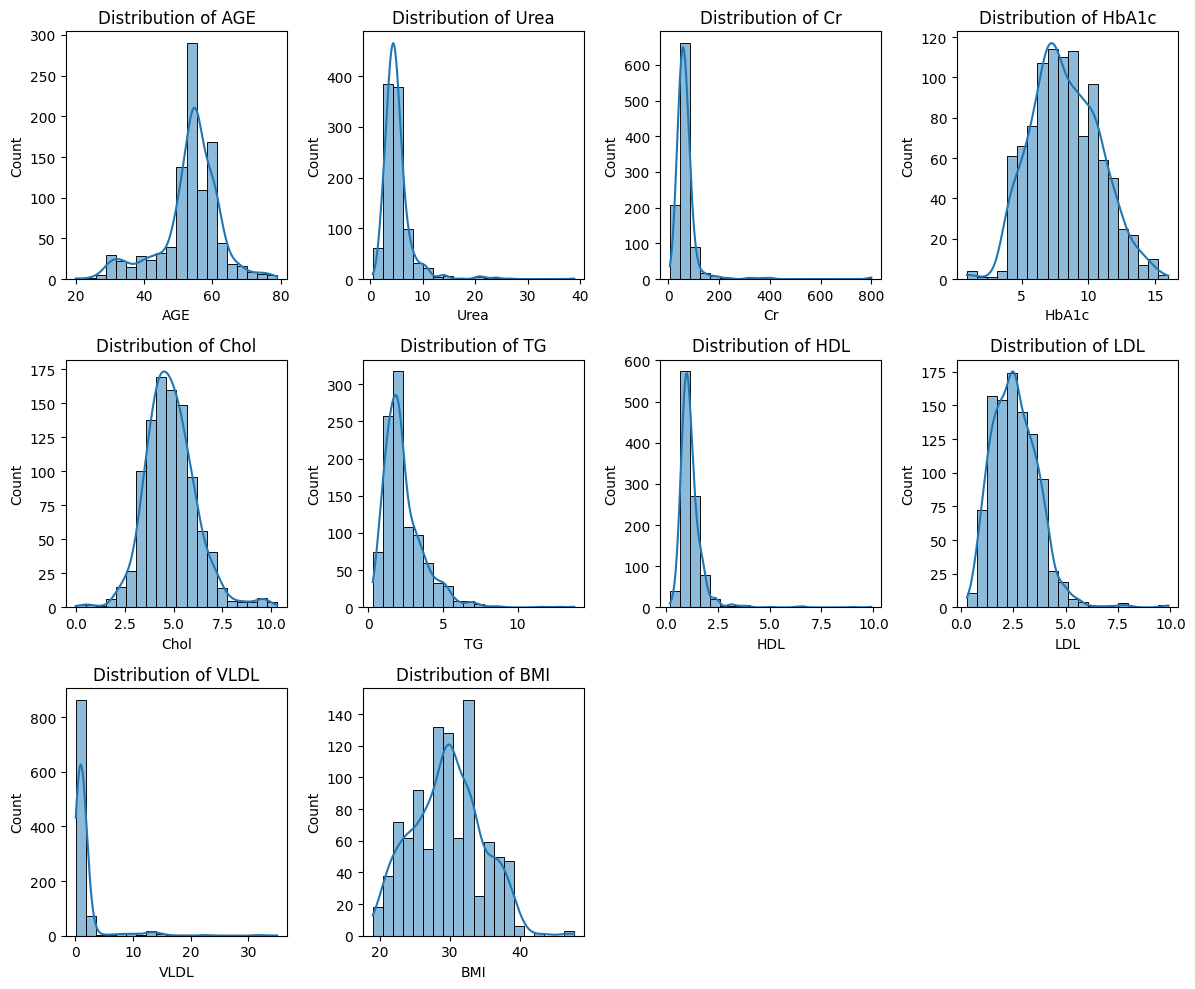

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting histograms
numerical_columns = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


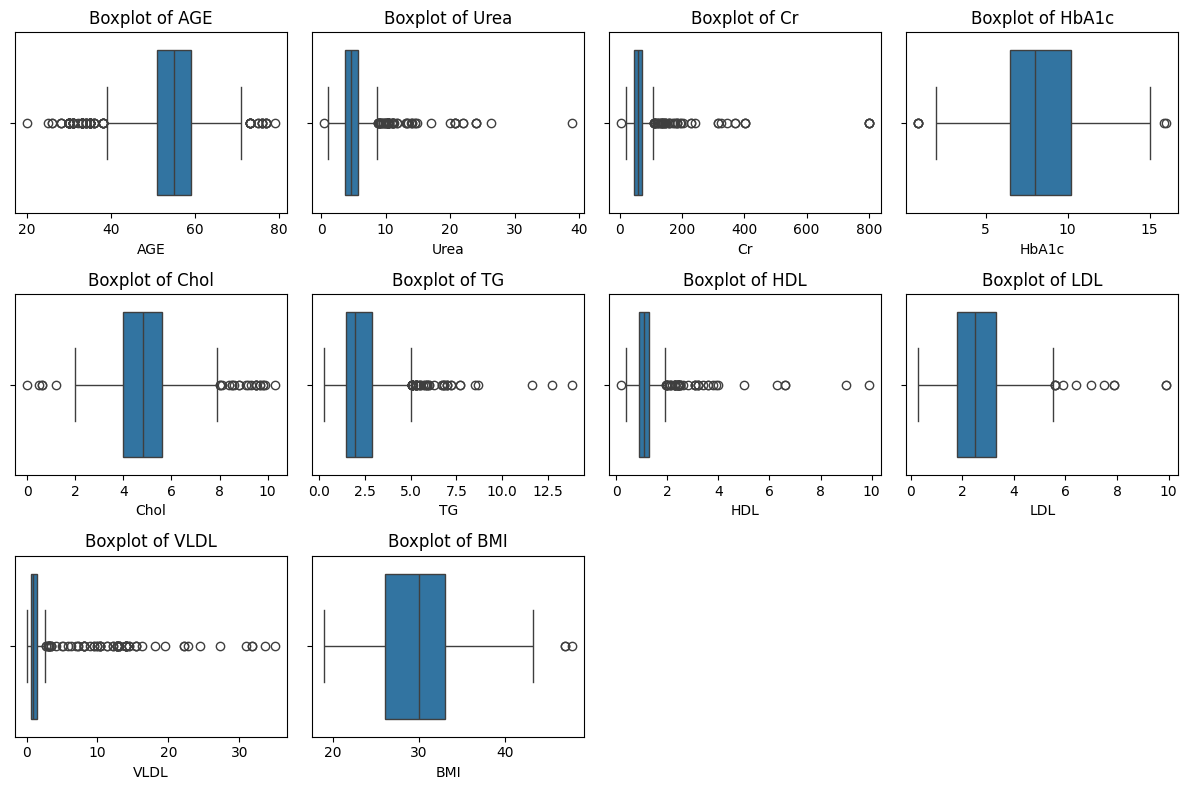

In [180]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


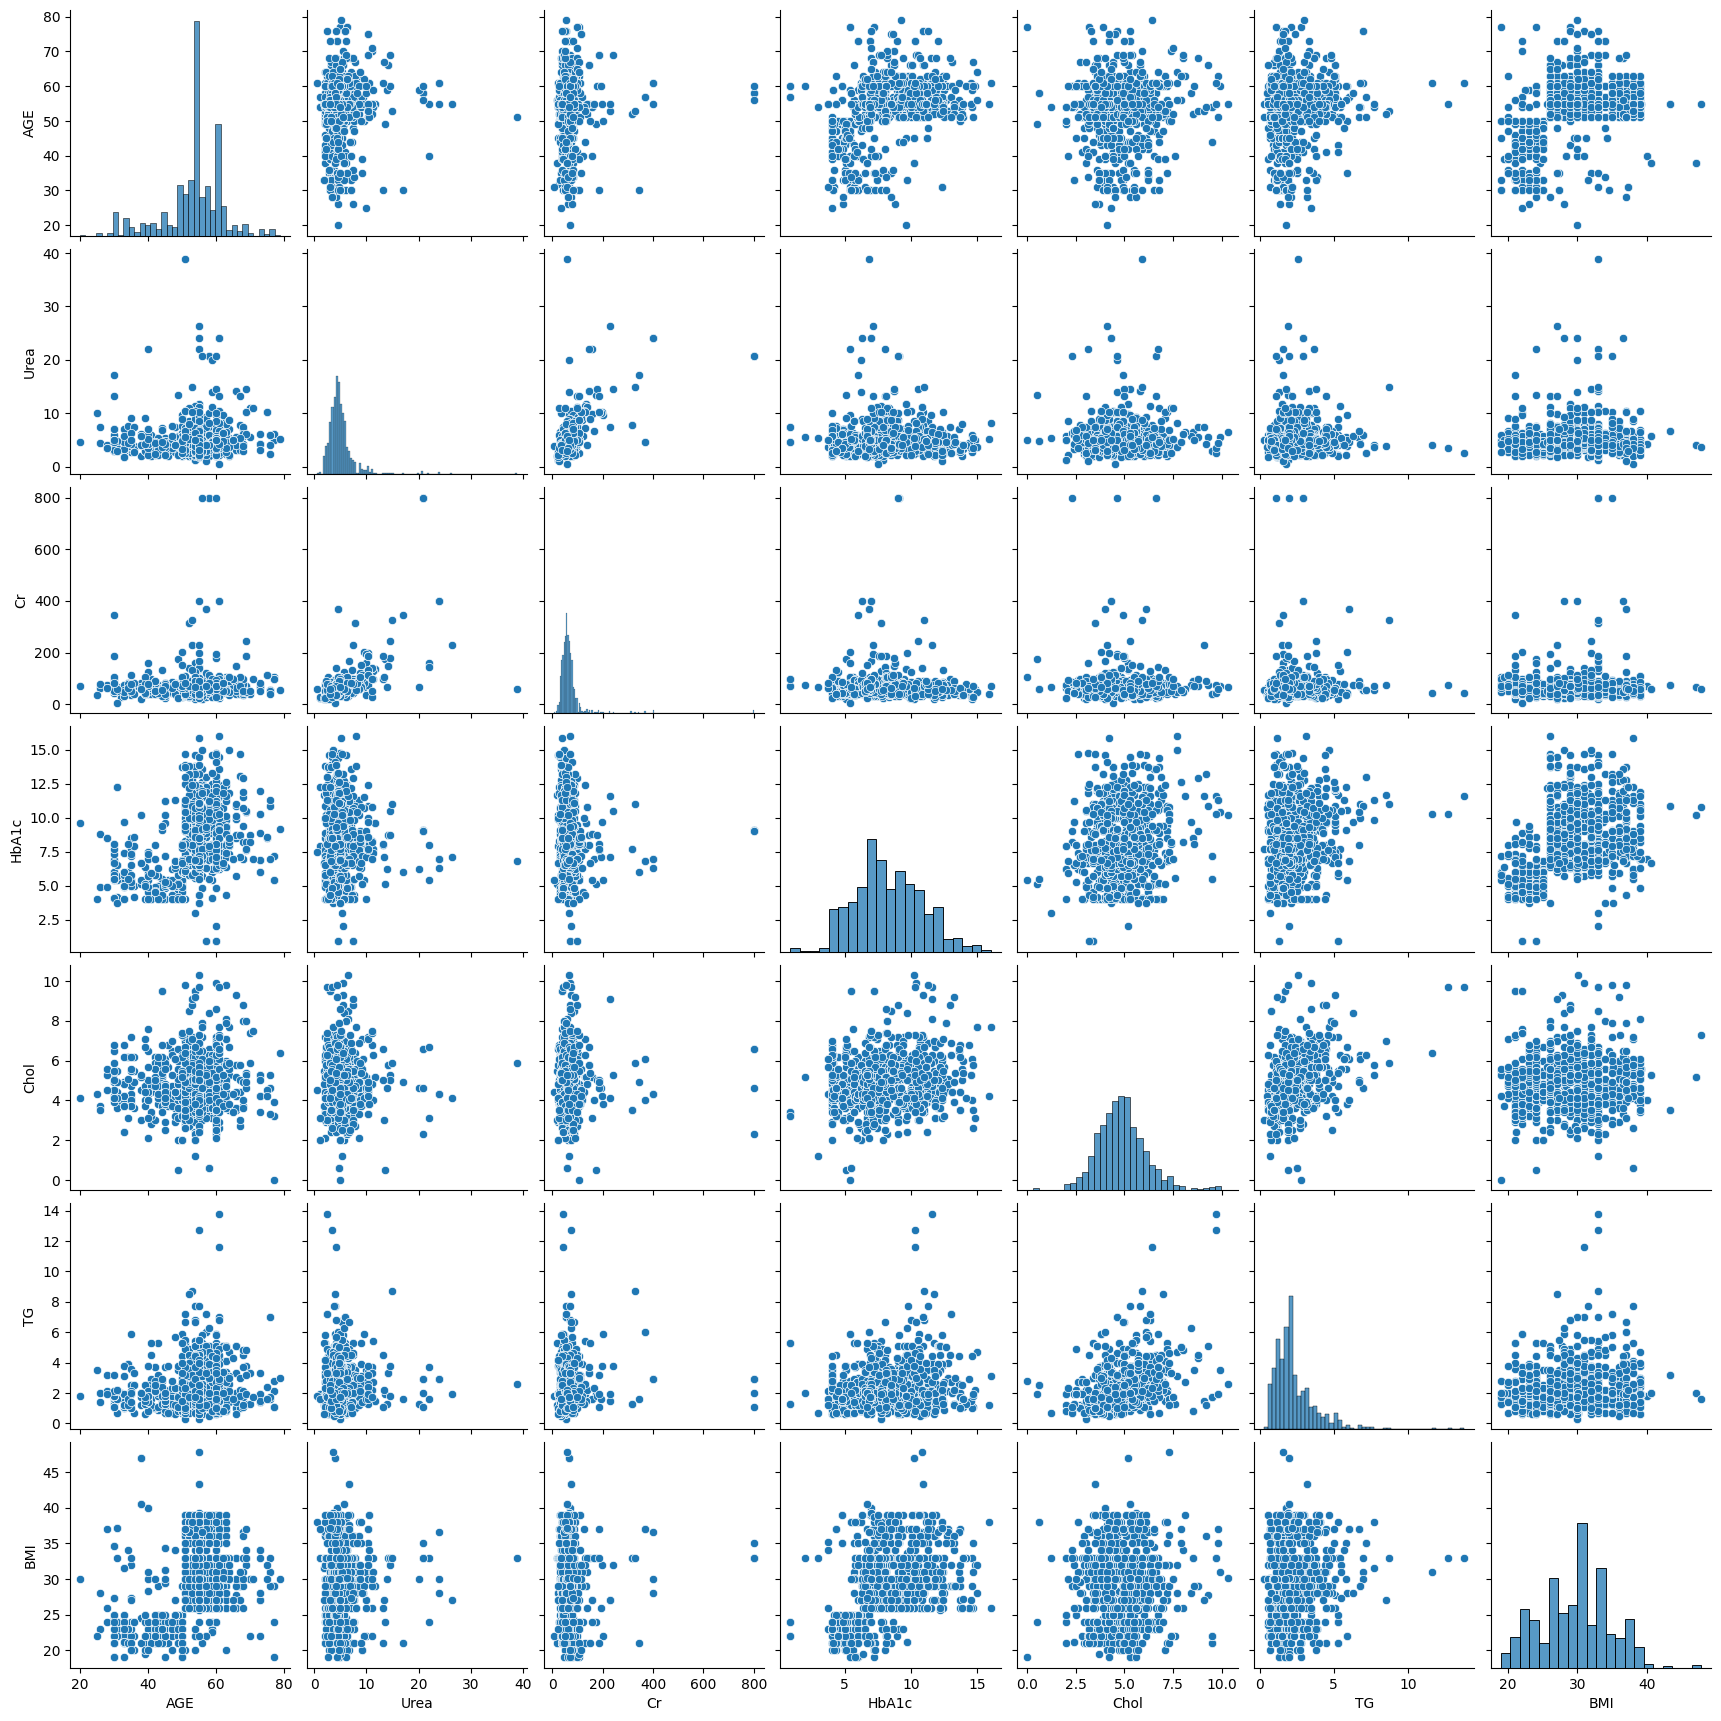

In [181]:
# Pairplot of selected columns
selected_cols = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'BMI']
sns.pairplot(df[selected_cols])
plt.show()


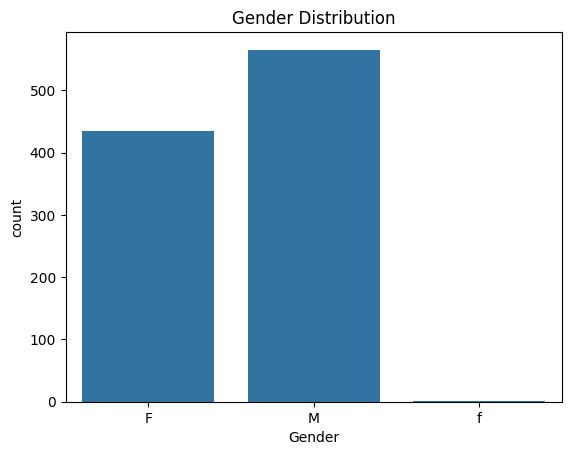

In [182]:
# Bar plot for Gender
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.show()

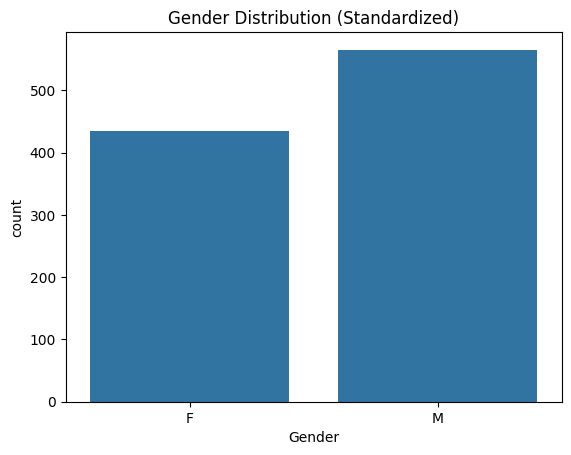

In [183]:
# Standardize the 'Gender' column by combining 'f' with 'F'
df['Gender'] = df['Gender'].replace({'f': 'F'})

# After replacing, you can re-plot the bar plot to see the updated distribution
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution (Standardized)')
plt.show()


In [184]:
# Rename 'CLASS' column to 'Class'
df.rename(columns={'CLASS': 'Class'}, inplace=True)

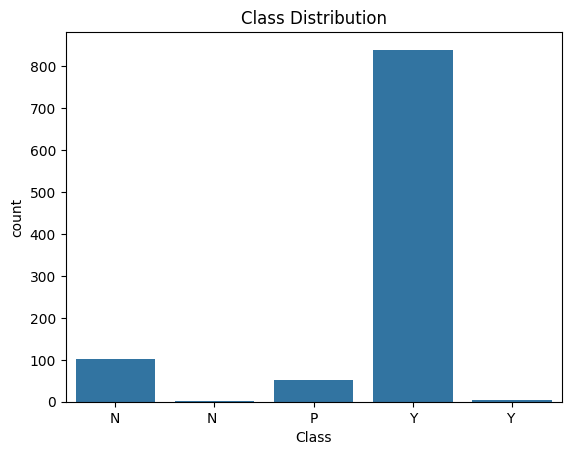

In [185]:
# Bar plot for CLASS
sns.countplot(data=df, x='Class')
plt.title('Class Distribution')
plt.show()

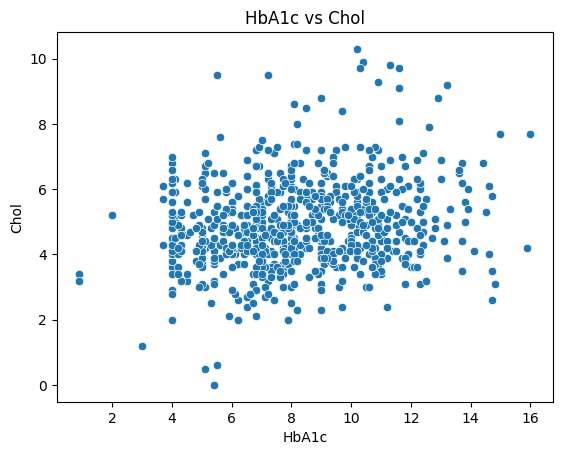

In [186]:
# Scatter plot between two variables
sns.scatterplot(data=df, x='HbA1c', y='Chol')
plt.title('HbA1c vs Chol')
plt.show()


In [187]:
print(df.columns)

Index(['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL',
       'VLDL', 'BMI', 'Class'],
      dtype='object')


In [188]:
# Rename 'AGE' column to 'Age'
df.rename(columns={'AGE': 'Age'}, inplace=True)

In [190]:
print(df['Class'].unique())
print(df['Class'].value_counts())

['N' 'N ' 'P' 'Y' 'Y ']
Class
Y     840
N     102
P      53
Y       4
N       1
Name: count, dtype: int64


In [191]:
# Step 1: Standardize the Class column
df['Class'] = df['Class'].astype(str).str.strip().str.upper()

# Step 2: (Optional) Map to clean labels if needed
df['Class'] = df['Class'].replace({
    'YES': 'Y',
    'NO': 'N'
    # Add other mappings if needed
})

# Step 3: Confirm unique classes
print(df['Class'].unique())
print(df['Class'].value_counts())


['N' 'P' 'Y']
Class
Y    844
N    103
P     53
Name: count, dtype: int64


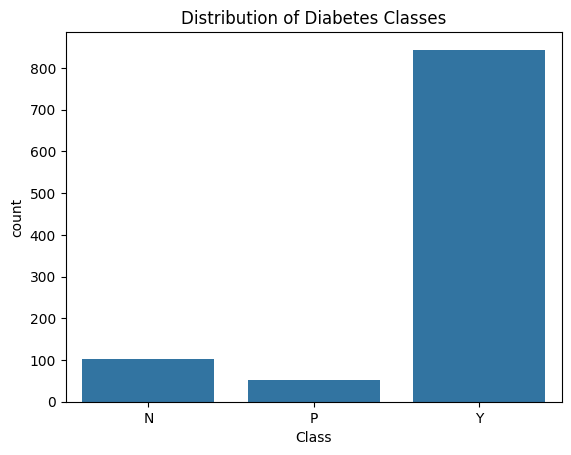

In [192]:
# Class balance
sns.countplot(x="Class", data=df)
plt.title("Distribution of Diabetes Classes")
plt.show()

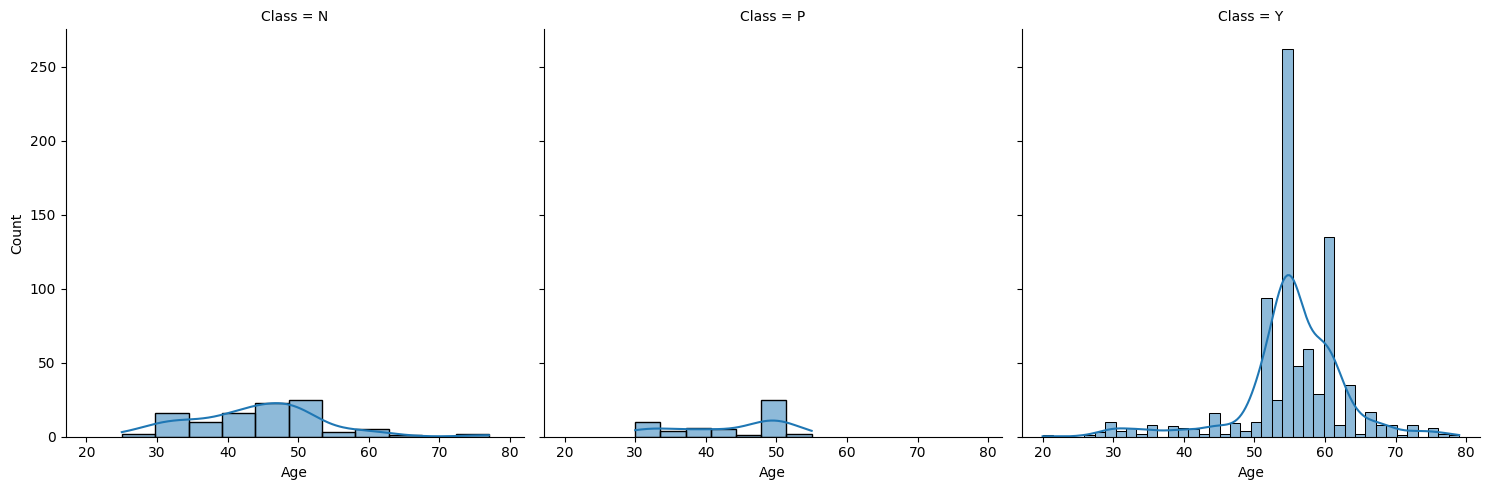

In [193]:
# FacetGrid to show AGE distribution by CLASS
g = sns.FacetGrid(df, col='Class', height=5)
g.map(sns.histplot, 'Age', kde=True)
plt.show()

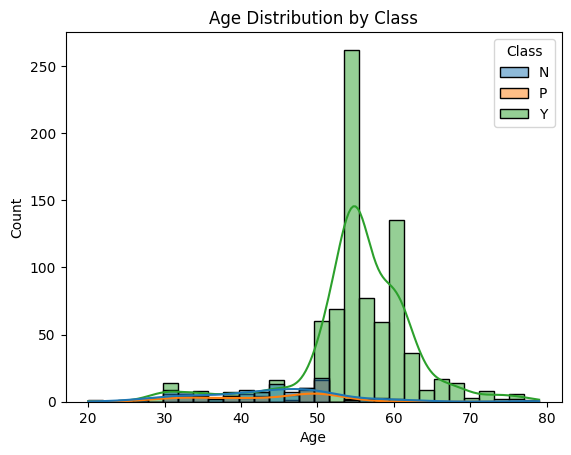

In [194]:
# Age distribution by Class
sns.histplot(data=df, x="Age", hue="Class", kde=True, bins=30)
plt.title("Age Distribution by Class")
plt.show()

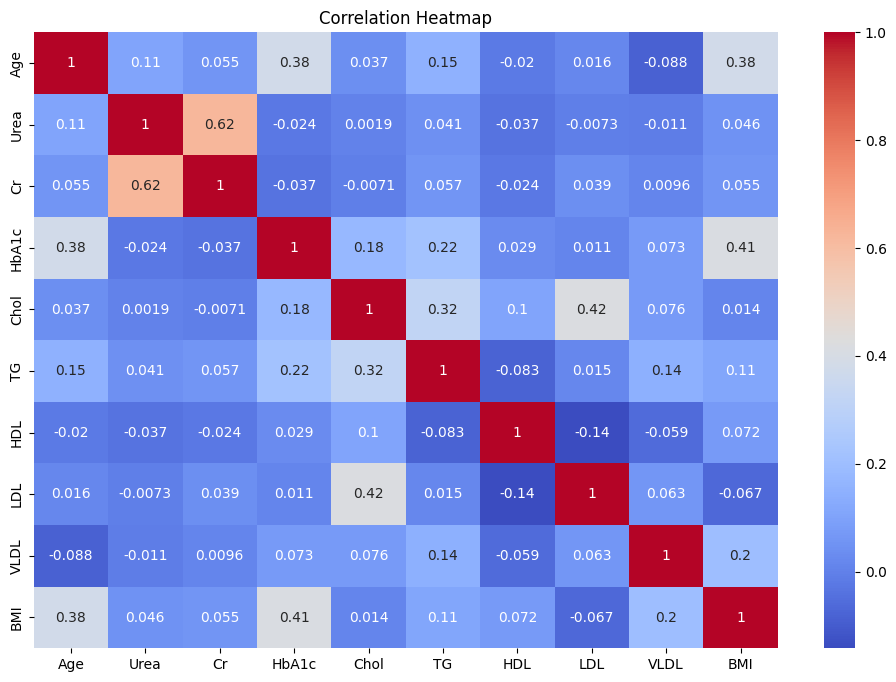

In [195]:
# Correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [196]:
df.head()

,Gender,Age,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [197]:
df.tail()

,Gender,Age,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
995,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y
999,M,54,5.0,67,6.9,3.8,1.7,1.1,3.0,0.7,33.0,Y


In [199]:
import pickle
# Save the polished DataFrame to a .pkl file
df.to_pickle('polished_data.pkl')

print("Data saved as 'processed_data.pkl'")


Data saved as 'processed_data.pkl'


In [201]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")


RANDOM_STATE = 42
N_SPLITS = 5




In [205]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, class_weight="balanced", random_state=RANDOM_STATE),
    "Random Forest": RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=RANDOM_STATE),
    "XGBoost": XGBClassifier(objective="multi:softprob", num_class=3, n_estimators=200,
                             random_state=RANDOM_STATE, eval_metric="mlogloss"),
    "SVM": SVC(probability=True, class_weight="balanced", random_state=RANDOM_STATE)
}


preprocessor = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("scale", StandardScaler())
])



In [206]:

X_array = preprocessor.fit_transform(X)  
y_array = y.values 

skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=RANDOM_STATE)


In [210]:

results = []

for name, model in models.items():
    print(f"\n🔹 Running {name} with {N_SPLITS}-fold Stratified CV...")
    fold_scores = []
    for fold, (train_idx, val_idx) in enumerate(skf.split(X_array, y_array), 1):
        X_tr, X_val = X_array[train_idx], X_array[val_idx]
        y_tr, y_val = y_array[train_idx], y_array[val_idx]
        
        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_val)
        
        f1_macro = f1_score(y_val, y_pred, average="macro")
        fold_scores.append(f1_macro)
        print(f"  Fold {fold}: Macro-F1 = {f1_macro:.3f}")
    
    mean_f1 = np.mean(fold_scores)
    std_f1 = np.std(fold_scores)
    results.append({"Model": name, "Macro-F1 Mean": mean_f1, "Macro-F1 Std": std_f1})
    print(f"✅ {name} Average Macro-F1 = {mean_f1:.3f} ± {std_f1:.3f}")
    print("-------------------------------------------------------")

# Collect results
df_results = pd.DataFrame(results).sort_values(by="Macro-F1 Mean", ascending=False)
print("\n==== Cross-Validation Results ====")



🔹 Running Logistic Regression with 5-fold Stratified CV...
  Fold 1: Macro-F1 = 0.882
  Fold 2: Macro-F1 = 0.759
  Fold 3: Macro-F1 = 0.785
  Fold 4: Macro-F1 = 0.745
  Fold 5: Macro-F1 = 0.753
✅ Logistic Regression Average Macro-F1 = 0.785 ± 0.050
-------------------------------------------------------

🔹 Running Random Forest with 5-fold Stratified CV...
  Fold 1: Macro-F1 = 0.991
  Fold 2: Macro-F1 = 0.973
  Fold 3: Macro-F1 = 0.910
  Fold 4: Macro-F1 = 0.879
  Fold 5: Macro-F1 = 0.948
✅ Random Forest Average Macro-F1 = 0.940 ± 0.041
-------------------------------------------------------

🔹 Running XGBoost with 5-fold Stratified CV...
  Fold 1: Macro-F1 = 1.000
  Fold 2: Macro-F1 = 0.991
  Fold 3: Macro-F1 = 0.947
  Fold 4: Macro-F1 = 0.878
  Fold 5: Macro-F1 = 0.980
✅ XGBoost Average Macro-F1 = 0.959 ± 0.044
-------------------------------------------------------

🔹 Running SVM with 5-fold Stratified CV...
  Fold 1: Macro-F1 = 0.836
  Fold 2: Macro-F1 = 0.779
  Fold 3: Macro-F1 =

In [211]:
display(df_results)

,Model,Macro-F1 Mean,Macro-F1 Std
2,XGBoost,0.959416,0.044226
1,Random Forest,0.940241,0.040773
0,Logistic Regression,0.784650,0.050383
3,SVM,0.775495,0.038440


Opt for XGBoost to maximize performance, leveraging its highest average Macro-F1 score (0.959 ± 0.044). If speed is a priority, use Random Forest for a strong, close-performing alternative (0.940 ± 0.041).